In this file, we will discuss on **`Comparision of using PCA vs StandardScaler in classification problem`**!

Moreover, I only focus on using `SVM` to evaluate the model!

> Section A. using `iris_data` with 150 observations & 4 features only
>
> Section B. using `mnist_data` with over 60000 observations

In each Section, we will consider 4 approaches:
>> `Using StandarScaler() without PCA()`
>
>> `Using PCA() without StandarScaler()`
>
>> `Using StandarScaler() then PCA()`
>
>> `Using PCA() then StandarScaler()`

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## A. With iris_data

In [2]:
iris = sns.load_dataset("iris")
print('column_names in this dataset', iris.columns)
y = iris['species']
print('unique_values in species :', y.unique())

column_names in this dataset Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
unique_values in species : ['setosa' 'versicolor' 'virginica']


Now, assign the values in the label `species` to {0, 1, 2} then look at these following boxplot

shape of data (features): (150, 4)
Label_unique_values after replacing:  [0 1 2]


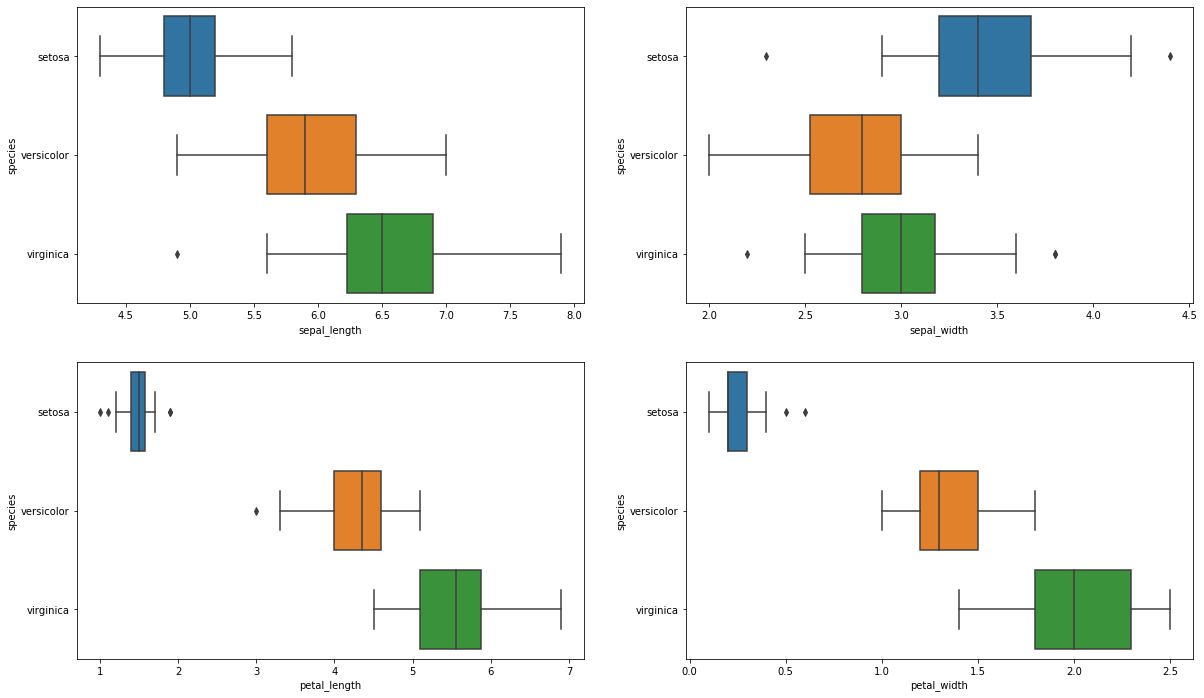

In [3]:
y = iris['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})
X = iris.iloc[:, :-1]

print('shape of data (features):', X.shape)

print('Label_unique_values after replacing: ', y.unique())
plt.figure(figsize = (20, 12))
for k in range(4):
    plt.subplot(2, 2, k+1)
    sns.boxplot(x = iris.columns[k], y = 'species', data = iris)

### A.1. Using StandardScaler vs SVM only (without using PCA)

In [4]:
ssc = StandardScaler()
X_sc = ssc.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.33, stratify = y, random_state = 11)

### using SVM to predict

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

clf = SVC()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_pred_test, y_test))

print('Train_acc = %s \nTest_acc = %s'%
      (accuracy_score(y_pred_train, y_train), accuracy_score(y_pred_test, y_test)))

print('Classification report: \n', classification_report(y_pred_test, y_test))

Confusion matrix: 
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 16]]
Train_acc = 0.97 
Test_acc = 0.98
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.94      1.00      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### A.2. Using PCA(0.99) and SVM only (without StandardScaler)

In [7]:
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify = y, random_state = 11)

pca = PCA(0.99)
pca.fit(X_train)
pca.n_components_

3

So, to keep at-least 99% information from the dataset we must use 3 components (PC's) in this dataset

In [8]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape, X_test_pca.shape

((100, 3), (50, 3))

In [9]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred_train = clf.predict(X_train_pca)
y_pred_test = clf.predict(X_test_pca)

print('Confusion matrix: \n', confusion_matrix(y_pred_test, y_test))

print('Train_acc = %s \nTest_acc = %s'%
      (accuracy_score(y_pred_train, y_train), accuracy_score(y_pred_test, y_test)))

print('Classification report: \n', classification_report(y_pred_test, y_test))

Confusion matrix: 
 [[16  0  0]
 [ 0 17  2]
 [ 0  0 15]]
Train_acc = 0.97 
Test_acc = 0.96
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.89      0.94        19
           2       0.88      1.00      0.94        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



The `iris_data` is not `big_data problem` so using `PCA` leads to reducing the `f1_score` and `accuracy`

### A.3. Using StandardScaler then PCA before using SVM

In [10]:
ssc = StandardScaler()
X_sc = ssc.fit_transform(X)

pca = PCA(0.99)
pca.fit(X_sc)
X_sc_pca = pca.transform(X_sc)
X_train, X_test, y_train, y_test = train_test_split(X_sc_pca, y, test_size = 0.33, stratify = y, random_state = 11)

clf = SVC()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_pred_test, y_test))

print('Train_acc = %s \nTest_acc = %s'%
      (accuracy_score(y_pred_train, y_train), accuracy_score(y_pred_test, y_test)))

print('Classification report: \n', classification_report(y_pred_test, y_test))

Confusion matrix: 
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 16]]
Train_acc = 0.97 
Test_acc = 0.98
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.94      1.00      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### A.4. Using PCA then StandardScaler before using SVM

In [11]:
pca = PCA(0.99)
pca.fit(X)
X_pca = pca.transform(X)
ssc = StandardScaler()
X_pca_sc = ssc.fit_transform(X_pca)

X_train, X_test, y_train, y_test = train_test_split(X_pca_sc, y, test_size = 0.33, stratify = y, random_state = 11)

clf = SVC()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_pred_test, y_test))

print('Train_acc = %s \nTest_acc = %s'%
      (accuracy_score(y_pred_train, y_train), accuracy_score(y_pred_test, y_test)))

print('Classification report: \n', classification_report(y_pred_test, y_test))

Confusion matrix: 
 [[16  0  0]
 [ 0 17  0]
 [ 0  0 17]]
Train_acc = 0.95 
Test_acc = 1.0
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



### Compare X_pca_sc and X_sc_pca

In [12]:
(X_pca_sc == X_sc_pca).all(), (X_pca_sc == X_sc_pca).any()

(False, False)

In [13]:
np.array_equal(X_pca_sc, X_sc_pca)

False

- So with the `non-big dataset` like `iris_data` in the `classification_problem`, using `PCA() & StandardScaler()` or only `StandardScaler()` give the nice `f1_score`.

- But using `PCA()` in case the dataset has only 150 observations and 4 features will miss the importance_information (if we reduce the `numbers of PC's` to 1 or 2)!

- Using `PCA()` in the `big_data` will be better since we can decrease a large number of `non_importance_informations` from the `original_data`!


## B. With `mnist_data`

In [14]:
import tensorflow as tf
%time (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Wall time: 252 ms


### Display the target's information

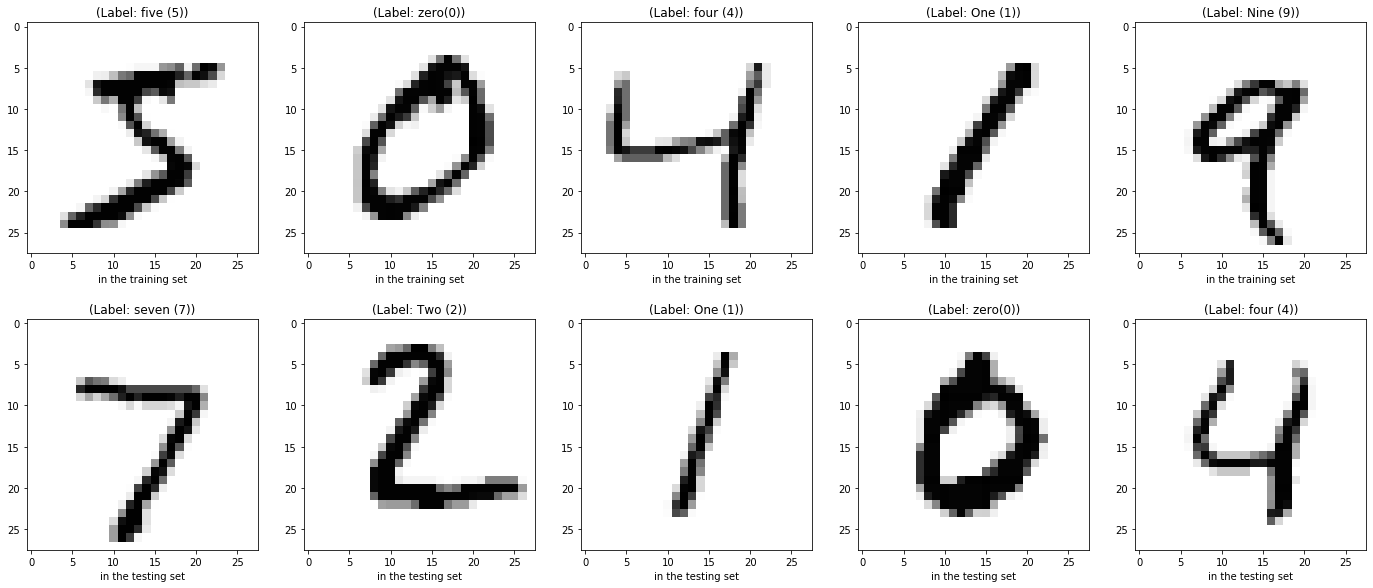

In [15]:
import matplotlib.pyplot as plt

label_dict = {
 0: 'zero(0)',
 1: 'One (1)',
 2: 'Two (2)',
 3: 'Three (3)',
 4: 'four (4)',
 5: 'five (5)',
 6: 'six (6)',
 7: 'seven (7)',
 8: 'eight (8)',
 9: 'Nine (9)',
}

plt.figure(figsize=[24, 10])

# Display the 5 first images in training data  (5 top images)
for k in range(5):
    plt.subplot(2, 5, k+1)
    curr_img = x_train[k]
    plt.imshow(curr_img, cmap='Greys')
    plt.title("(Label: " + str(label_dict[y_train[k]]) + ")")
    plt.xlabel("in the training set")

    # Display the first 5 images in testing data
    plt.subplot(2, 5, k+6)
    curr_img = x_test[k]
    plt.imshow(curr_img, cmap='Greys')
    plt.title("(Label: " + str(label_dict[y_test[k]]) + ")")
    plt.xlabel("in the testing set")

Viewing shape of data

In [16]:
names = ['x_train', 'y_train', 'x_test', 'y_test']
data = [x_train, y_train, x_test, y_test]
for k in range(4):
    print(names[k]+'_shape: \t', data[k].shape)

x_train_shape: 	 (60000, 28, 28)
y_train_shape: 	 (60000,)
x_test_shape: 	 (10000, 28, 28)
y_test_shape: 	 (10000,)


Since the shapes of `x_train, x_test` is an `3D_arrays` so to using `train_test_split`, we must reshape them to `2D_arrays`

### B.1. The same approach with A.1

In [17]:
X_train = x_train.reshape(x_train.shape[0], -1)
X_test = x_test.reshape(x_test.shape[0], -1)
ssc = StandardScaler()
X_train_sc = ssc.fit_transform(X_train)
X_test_sc = ssc.transform(X_test)

X_train_sc.shape, X_test_sc.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [18]:
svc = SVC(kernel = 'linear')
%time svc.fit(X_train_sc, y_train)

%time y_pred_train = svc.predict(X_train_sc)
%time y_pred_test = svc.predict(X_test_sc)
   
print('Confusion matrix: \n', confusion_matrix(y_pred_test, y_test))

print('Train_acc = %.4f \nTest_acc = %.4f'%
      (accuracy_score(y_pred_train, y_train), accuracy_score(y_pred_test, y_test)))

print('Classification report: \n', classification_report(y_pred_test, y_test))

Wall time: 9min 29s
Wall time: 9min 5s
Wall time: 1min 28s
Confusion matrix: 
 [[ 951    0   10    7    3    7   12    2   12    6]
 [   0 1119   13    1    2    6    3    8    6    7]
 [   5    6  956   15   18    7   13   23   11    6]
 [   2    2   11  941    1   41    1   13   28   10]
 [   2    0    7    0  929    6    8   10    8   36]
 [   8    1    4   16    0  789   17    1   24    4]
 [   8    2    5    1    3   12  902    0    9    1]
 [   2    1    6    6    5    2    0  945    6   23]
 [   1    4   18   19    4   19    2    5  858   13]
 [   1    0    2    4   17    3    0   21   12  903]]
Train_acc = 0.9821 
Test_acc = 0.9293
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      1010
           1       0.99      0.96      0.97      1165
           2       0.93      0.90      0.91      1060
           3       0.93      0.90      0.91      1050
           4       0.95      0.92      0.93      1006
  

### B.2. The same approach with A.2

In [19]:
X_train = x_train.reshape(x_train.shape[0], -1)
X_test = x_test.reshape(x_test.shape[0], -1)
pca = PCA(0.99)
%time X_train_pca = pca.fit_transform(X_train)
%time X_test_pca = pca.transform(X_test)
print(pca.n_components_)
X_train_pca.shape, X_test_pca.shape

Wall time: 5.82 s
Wall time: 121 ms
331


((60000, 331), (10000, 331))

This meant to keep 99% information, we only use the first `331 PC's` in total 784 columns

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

svc = SVC()
%time svc.fit(X_train_pca, y_train)

%time y_pred_train = svc.predict(X_train_pca)
%time y_pred_test = svc.predict(X_test_pca)

print('Confusion matrix: \n', confusion_matrix(y_pred_test, y_test))

print('Train_acc = %.4f \nTest_acc = %.4f'%
      (accuracy_score(y_pred_train, y_train), accuracy_score(y_pred_test, y_test)))

print('Classification report: \n', classification_report(y_pred_test, y_test))

Wall time: 3min 36s
Wall time: 5min
Wall time: 48.3 s
Confusion matrix: 
 [[ 973    0    5    0    0    2    5    0    3    3]
 [   0 1127    1    0    0    0    2    5    0    4]
 [   1    3 1013    1    3    0    0    9    2    1]
 [   0    1    0  998    0    6    0    1    5    6]
 [   0    0    1    0  964    0    2    0    4   10]
 [   2    1    0    2    0  877    3    0    2    1]
 [   1    1    1    0    4    3  945    0    1    1]
 [   1    1    7    5    0    1    0 1003    2    6]
 [   2    1    3    3    1    2    1    1  952    2]
 [   0    0    1    1   10    1    0    9    3  975]]
Train_acc = 0.9940 
Test_acc = 0.9827
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       991
           1       0.99      0.99      0.99      1139
           2       0.98      0.98      0.98      1033
           3       0.99      0.98      0.98      1017
           4       0.98      0.98      0.98       981
       

In this case, we have improve the `train_acc, test_acc` and `f1_score` by using only `PCA()`

### B.3 Same approach with A.3

In [21]:
ssc = StandardScaler()
%time X_train_sc = ssc.fit_transform(X_train)
%time X_test_sc = ssc.fit_transform(X_test)

pca = PCA(0.99)
pca.fit(X_train_sc, y_train)
%time X_train_sc_pca = pca.transform(X_train_sc)
%time X_test_sc_pca = pca.transform(X_test_sc)

svc = SVC()
%time svc.fit(X_train_sc_pca, y_train)
%time y_pred_train = svc.predict(X_train_sc_pca)
%time y_pred_test = svc.predict(X_test_sc_pca)

print('Confusion matrix: \n', confusion_matrix(y_pred_test, y_test))

print('Train_acc = %.4f \nTest_acc = %.4f'%
      (accuracy_score(y_pred_train, y_train), accuracy_score(y_pred_test, y_test)))

print('Classification report: \n', classification_report(y_pred_test, y_test))

Wall time: 1.43 s
Wall time: 242 ms
Wall time: 964 ms
Wall time: 163 ms
Wall time: 7min 40s
Wall time: 9min 41s
Wall time: 1min 30s
Confusion matrix: 
 [[ 968    0    5    0    0    2    6    1    3    4]
 [   0 1126    1    0    0    0    2    6    0    4]
 [   1    4  996    3   13    2    0   13    6    6]
 [   1    0    2  982    0   11    0    3    5   10]
 [   0    0    2    1  945    1    4    3    6   14]
 [   3    1    0    6    2  857    7    0    9    3]
 [   3    2    1    0    3    6  929    0    3    0]
 [   2    0   15   11    7    5    6  989   12   21]
 [   2    2    9    7    2    6    4    0  927    3]
 [   0    0    1    0   10    2    0   13    3  944]]
Train_acc = 0.9862 
Test_acc = 0.9663
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       989
           1       0.99      0.99      0.99      1139
           2       0.97      0.95      0.96      1044
           3       0.97      0.97    

In this case (`big_data` like `mnist-dataset`), using both `Standard()` then `PCA` won't improve the `f1_score` also the `accuracy`, compared with using `PCA()` only!

### B.4. The same with A.4

In [22]:
pca = PCA(0.99)
pca.fit(X_train)
%time X_train_pca = pca.transform(X_train)
%time X_test_pca = pca.transform(X_test)

ssc = StandardScaler()
%time X_train_pca_sc = ssc.fit_transform(X_train_pca)
%time X_test_pca_sc = ssc.transform(X_test_pca)

svc = SVC()
%time svc.fit(X_train_pca_sc, y_train)
%time y_pred_train = svc.predict(X_train_pca_sc)
%time y_pred_test = svc.predict(X_test_pca_sc)

print('Confusion matrix: \n', confusion_matrix(y_pred_test, y_test))

print('Train_acc = %.4f \nTest_acc = %.4f'%
      (accuracy_score(y_pred_train, y_train), accuracy_score(y_pred_test, y_test)))

print('Classification report: \n', classification_report(y_pred_test, y_test))

Wall time: 709 ms
Wall time: 154 ms
Wall time: 563 ms
Wall time: 21.4 ms
Wall time: 13min 3s
Wall time: 12min 46s
Wall time: 2min 6s
Confusion matrix: 
 [[ 966    0    7    0    0    4    6    0    5    4]
 [   0 1121    2    1    0    2    3    5    0    3]
 [   2    3  991   11    9    3    4   19    6    4]
 [   2    0    4  964    0   16    0    4    8   14]
 [   1    1    3    1  954    4    4    4    2   16]
 [   3    1    0   10    0  844    6    2    4    0]
 [   3    4    5    0    2    9  933    0    2    0]
 [   0    1    4    9    2    0    0  980    3   14]
 [   3    4   15   12    3    9    2    2  943    8]
 [   0    0    1    2   12    1    0   12    1  946]]
Train_acc = 0.9947 
Test_acc = 0.9642
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       992
           1       0.99      0.99      0.99      1137
           2       0.96      0.94      0.95      1052
           3       0.95      0.95   

> So, in this case, using `PCA` only will get the best `f1-score` among 4 `mentioned approaches`

**Remarks 1.** Noting that the numbers of `PC's` :
- When using `PCA()` only **is equal to**  using `PCA() then StandardScaler()`
- When using `PCA() then StandardScaler()` **is not equal to** `StandardScaler() then PCA()` since the `structure` of the data has been changed!!

**`Verify`**

In [23]:
print(X_train_pca_sc.shape, X_train_sc_pca.shape)
np.array_equal(X_train_pca_sc, X_train_sc_pca)

(60000, 331) (60000, 543)


False

**Remarks 2.**
- In this verification, the numbers of `PC's` when using `StandardScaler()` before `PCA()` is 543 >> 331 : the numbers of `PC's` when using `PCA()` then `StandardScaler()`!! So, the `B3_approach` keep more information than `B4_approach`; which leads to the `f1_score` and `accuarcy` in `B3` will be better than in `B4's approach`.

- When using `PCA()`, each `PC's` now is `independence` each others and distributed `normal` centered at `0`! See the following histograms of the first 9 PC's

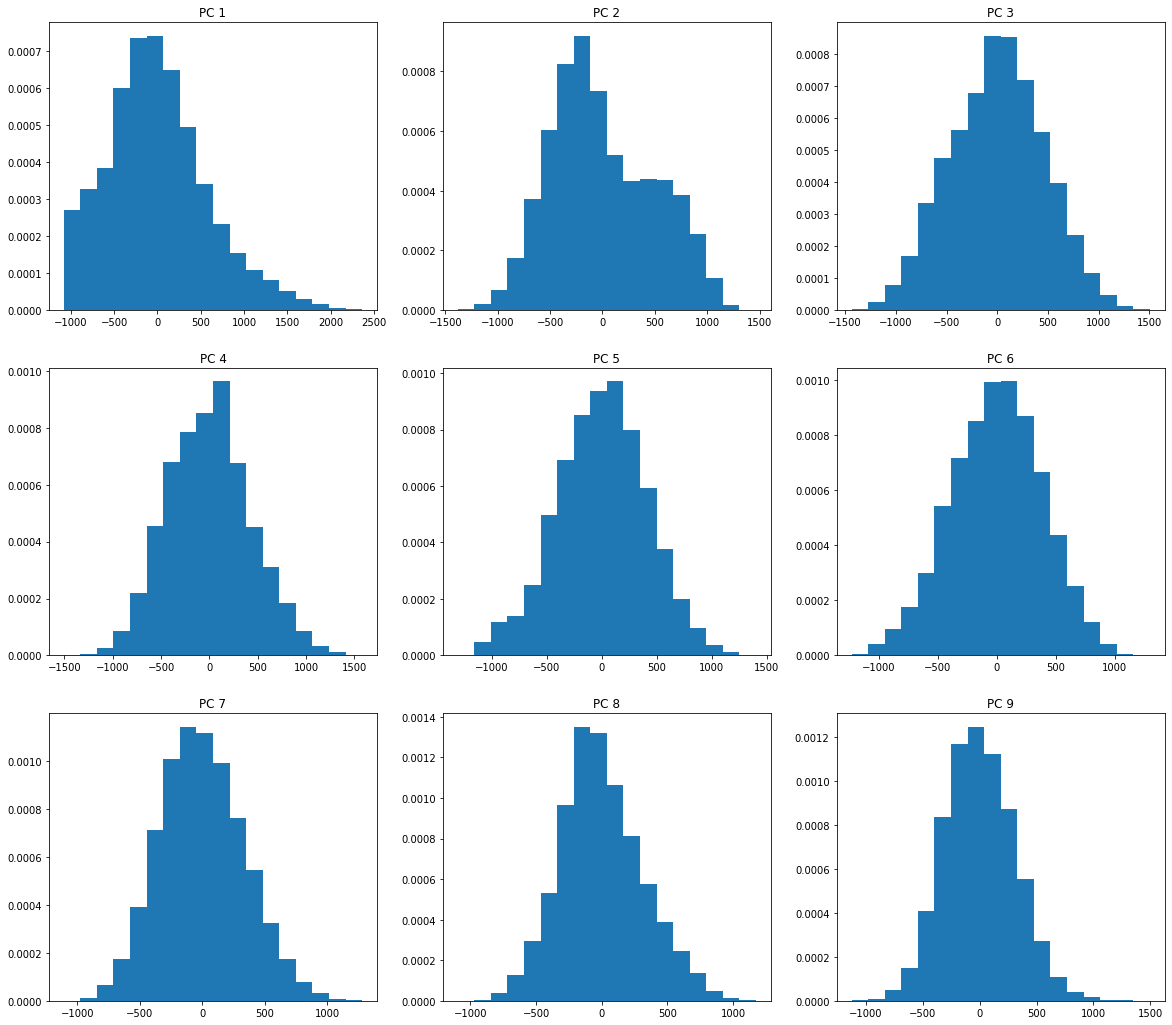

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 18))
for k in range(9):
    plt.subplot(3, 3, k+1)
    plt.hist(X_train_pca[:, k], bins = 18, density = True)
    plt.title('PC %s'%(k+1))